In [6]:
#get urls

#get exams

#split them

#add data to existing dataframe

#write functions to make searchable

In [31]:
url = 'https://apcentral.collegeboard.org/courses/ap-calculus-ab/exam/past-exam-questions'

In [32]:
import requests
from bs4 import BeautifulSoup

In [33]:
r = requests.get(url)
soup = BeautifulSoup(r.text, 'lxml')

In [34]:
urls = soup.find_all('table')

In [36]:
urls[-5].find('caption').text

'2002: Form B'

In [91]:
import os
links = {}
for url in urls:
    k = url.find('caption').text
    #os.mkdir(url.find('caption').text.replace(' ', '_').replace(':', ''))
    links[k] = url.find('a').attrs['href']
for link in links:
    if links[link].startswith('https:'):
        pass
    else:
        links[link] = 'https://secure-media.collegeboard.org' + links[link]

In [94]:
for link in links:
    directory = link.replace(' ', '_').replace(':', '')
    r = requests.get(links[link])
    open(f'{directory}/full_exam.pdf', 'wb').write(r.content)

In [97]:
import pikepdf
from pikepdf import Pdf

for exam in links:
    directory = exam.replace(' ', '_').replace(':', '')
    try:
        pdf = pikepdf.open(f'{directory}/full_exam.pdf')
        for n, page in enumerate(pdf.pages):
            if n > 0:

                    dst = Pdf.new()
                    dst.pages.append(page)
                    dst.save(f'{directory}/problem_{n}.pdf')
    except:
        print(yr)

08
08


In [99]:
from wand.image import Image as WImage

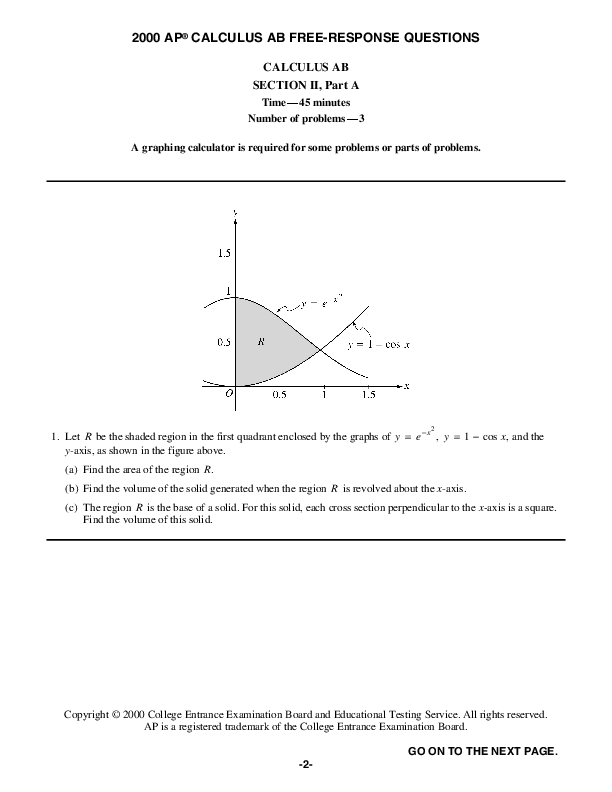

In [101]:
WImage(filename = '2000_Free-Response_Questions/problem_1.pdf')

In [102]:
import pandas as pd

In [103]:
df = pd.read_excel('ap10_calc_frq_coll_index.xls')

In [104]:
df.head()

,Year,Number,Function Presentation,Function Type,General Topics,Course Description Topics,Part,Calculator
0,2010,AB1 BC1,analytic,exponential,total change given rate of change,integral of a rate of change to give accumulat...,(a) (c) (d),active
1,2010,AB1 BC1,NaN,NaN,related rates,related rates,(b),NaN
2,2010,AB1 BC1,NaN,NaN,integration methods,antiderivatives following directly from deriva...,(c),NaN
3,2010,AB1 BC1,NaN,NaN,anti-differentiation (initial conditions),finding specific antiderivatives using initial...,(c),NaN
4,2010,AB2 BC2,tabular,general,"derivative, definition",approximate rate of change from graphs and tab...,(a),active


In [108]:
df = df.loc[df['Year'].isin(range(1998, 2020))]

In [109]:
df.head()

,Year,Number,Function Presentation,Function Type,General Topics,Course Description Topics,Part,Calculator
0,2010,AB1 BC1,analytic,exponential,total change given rate of change,integral of a rate of change to give accumulat...,(a) (c) (d),active
1,2010,AB1 BC1,NaN,NaN,related rates,related rates,(b),NaN
2,2010,AB1 BC1,NaN,NaN,integration methods,antiderivatives following directly from deriva...,(c),NaN
3,2010,AB1 BC1,NaN,NaN,anti-differentiation (initial conditions),finding specific antiderivatives using initial...,(c),NaN
4,2010,AB2 BC2,tabular,general,"derivative, definition",approximate rate of change from graphs and tab...,(a),active


In [111]:
testin = df[df['General Topics'].str.contains('derivative')]

In [112]:
testin.head(2)

,Year,Number,Function Presentation,Function Type,General Topics,Course Description Topics,Part,Calculator
4,2010,AB2 BC2,tabular,general,"derivative, definition",approximate rate of change from graphs and tab...,(a),active
103,2009,AB5 BC5,tabular,general,"derivative, definition",approximate rate of change from graphs and tab...,(a),neutral


In [118]:
print(testin.sample(1)['Year'].values[0])
print(testin.sample(1)['Number'].values[0][-1])

2001
4


In [156]:
def question_getter(input_string):
    testin = df[df['General Topics'].str.contains(input_string)]
    selection = testin.sample(1)
    yr = selection['Year'].values[0]
    num = selection['Number'].str[-1].values[0]
    try:
        return WImage(filename = f'{yr}_Free-Response_Questions/problem_{num}.pdf')
    #return num
    except:
        return 'Please try again, thank you!'

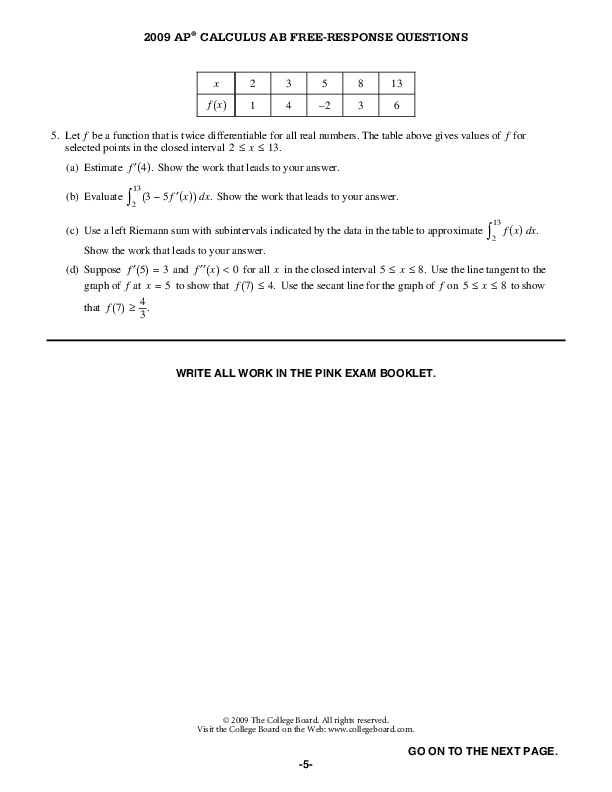

In [157]:
question_getter('differential equations')

In [30]:
a=pdf.pages[-1]

In [ ]:
a.

In [27]:
!pip install pikepdf

     |████████████████████████████████| 971 kB 283 kB/s eta 0:00:01
You should consider upgrading via the '/Users/jacobkoehler/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [4]:
for i in range(1998, 2020):
    yr = str(i)
    url = f'https://apcentral.collegeboard.org/pdf/ap{yr[:2]}-frq-calculus-ab.pdf'
    r = requests.get(url)
    open(f'{yr}/full_exam.pdf', 'wb').write(r.content)

In [24]:
def split(path):
    pdf = PdfFileReader(path).decrypt()
    for page in range(1, pdf.getNumPages()):
        pdf_writer = PdfFileWriter()
        pdf_writer.addPage(pdf.getPage(page))

        output = f'problem_{page}.pdf'
        with open(output, 'wb') as output_pdf:
            pdf_writer.write(path + output_pdf)

In [25]:
split('1999/full_exam.pdf')

TypeError: decrypt() missing 1 required positional argument: 'password'

In [6]:
!ls 1998/

full_exam.pdf


In [65]:
!cd ap_exams/

In [46]:
r = requests.get(url)

In [48]:
open('test.pdf', 'wb').write(r.content)

53306

In [26]:
with open('calcab_98.pdf', 'rb') as f:
    pdf = PdfFileReader(f)
    info = pdf.getDocumentInfo()

In [18]:
pdf = PdfFileReader('1998/full_exam.pdf')

In [28]:
def split(path, name_of_split):
    pdf = PdfFileReader(path)
    for page in range(pdf.getNumPages()):
        pdf_writer = PdfFileWriter()
        pdf_writer.addPage(pdf.getPage(page))

        output = f'{name_of_split}{page}.pdf'
        with open(output, 'wb') as output_pdf:
            pdf_writer.write(output_pdf)

In [29]:
path = 'jnotes.pdf'
split('calcab_98.pdf', 'examsplit')

In [58]:
import os

In [61]:
for i in range(1998, 2020):
    os.mkdir(str(i))

In [62]:
!pwd

/Users/jacobkoehler/Desktop/now/spring_20/calculus
